In [5]:
import numpy as np
import scipy
from scipy import sparse
from matplotlib import pyplot as plt

In [6]:
class ChambollePock(object):
    def __init__(self, n, m, tau, sigma, theta, N, A, v, data_weight):
        self.n = n
        self.m = m
        self.tau = tau
        self.sigma = sigma
        self.theta = theta 
        self.N = N
        self.A = A
        self.v = v
        self.data_weight = data_weight
        
    # Berechne den Wert des ROF-Zielfunktionales für x
    def objective(self, x):
        return self.data_weight / self.n * np.sum((x - self.v) ** 2) + 1 / self.n * np.sum(np.abs(self.A @ x))
    
    def proxF(self, y):
        return np.clip(y, -1/self.n, 1/self.n)
    
    def proxG(self, x):
        # Alte Version (tau fehlt!)
        #return (x + (2.0/self.n) * self.v) / (1+2.0/self.n)
        
        # Neue Version mit tau
        return (x + (2.0*self.data_weight/self.n) * self.tau * self.v) / (1 + 2.0*self.data_weight/self.n * self.tau)

    
    def run_algorithm(self):
        # Für die Werte des Zielfunktionals:
        obj_vals = np.empty(self.N+1)
    
        x = np.random.rand(self.n)
        y = np.random.rand(self.m)
        z = x
        obj_vals[0] = self.objective(x)
    
        for j in range(self.N): 
            y = self.proxF(y + self.sigma * self.A.dot(z))
            xneu = self.proxG(x - self.tau * self.A.transpose().dot(y))
            z = xneu + self.theta * (xneu - x)
            x = xneu
            
            obj_vals[j+1] = self.objective(x)
            #print(f"Aktueller Funktionswert: {obj_vals[j+1]}")
            
        return x, y, z, obj_vals
    

In [7]:
def v(values): # vektorisierte version von v(a) vorher
    return np.round(np.sin(4*values)) + np.round(np.cos(9*values)) + .1 * np.random.randn(values.size)

In [8]:
# Unterschiede zu vorher(in der Vorlesung): 
# (1) Die Funktion D(n) kann man weglassen und effizienter/direkter 
# mittels scipy.sparse.diags konstruieren
# (2) Die Funktion v von vorher kann man vektorisieren und dann direkt unten einsetzen
# (3) Die Funktion visualize_approximations zeigt die Approximation fuer 
# verschiedene Iterationszahlen N des Algorithmus an.

def show_approx(N):
    n = 300
    m = n - 1
    
    tau = 1 / (2 * n)
    sigma = tau
    theta = 1.0
    data_weight = 1e2
    
    A = scipy.sparse.diags(diagonals=[-n, n], offsets=[0, 1], shape=(n-1,n))
    discretized_interval = np.linspace(0, 2*np.pi, n)
    v1 = v(discretized_interval) # berechne die verrauschten Werte fuer jede Stelle im diskretisierten Intervall
    
    chambolle_pock = ChambollePock(n, m, tau, sigma, theta, N, A, v1, data_weight)
    x, y, z, obj_vals = chambolle_pock.run_algorithm()
    
    print(f"Erreichter Wert des ROF-Funktionals = {obj_vals[-1]:.3f}")
    
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(discretized_interval, v1)
    ax1.plot(discretized_interval, x)
    ax1.set_title("Iterationen N : {}".format(N))
    
    ax2.plot(obj_vals)
    ax2.set_title("Werte des ROF-Funktionals")
    ax2.set_xlabel("Iteration")
    plt.show()

Erreichter Wert des ROF-Funktionals = 37.077


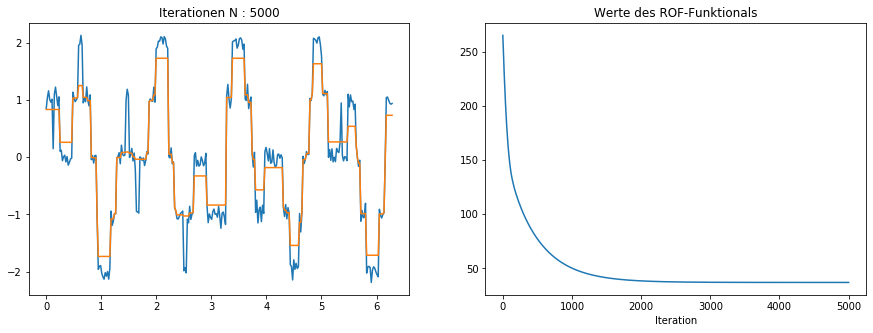

In [9]:
show_approx(N=5000)

In [10]:
# plottet die Approximationen fuer verschiedene Anzahlen an Iterationsdurchlauefen N
def visualize_approximations():
    for N in range(0, 5001, 1000): 
        show_approx(N)

Erreichter Wert des ROF-Funktionals = 271.685


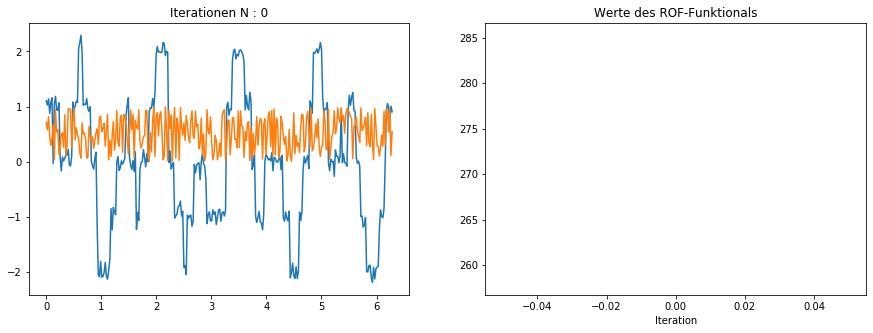

Erreichter Wert des ROF-Funktionals = 52.213


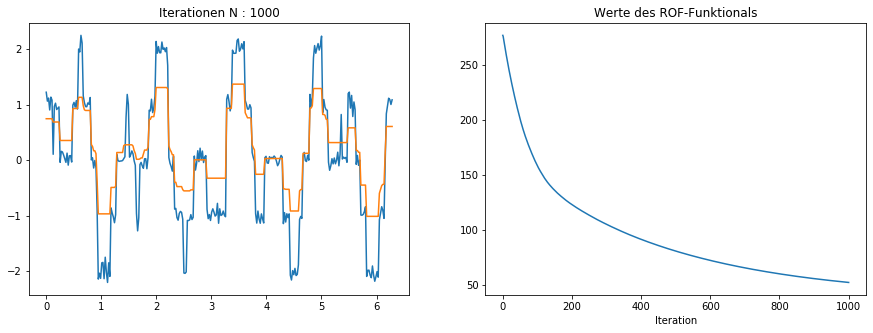

Erreichter Wert des ROF-Funktionals = 38.918


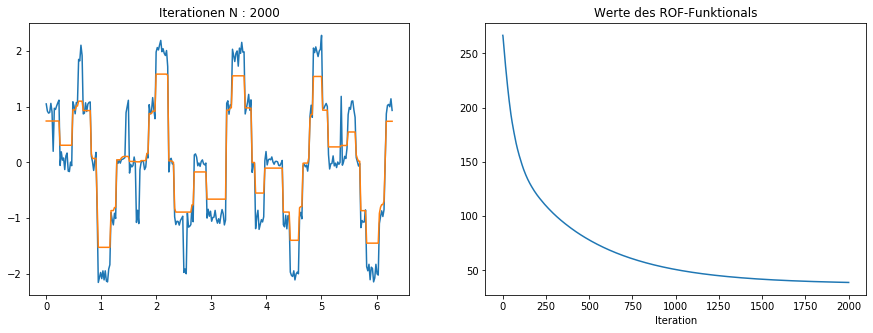

Erreichter Wert des ROF-Funktionals = 37.789


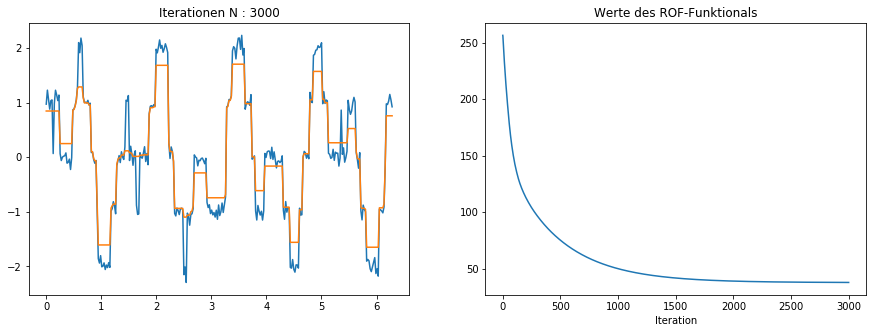

Erreichter Wert des ROF-Funktionals = 37.406


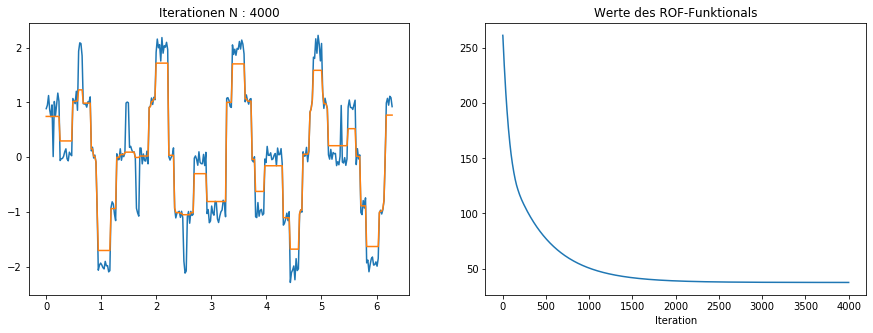

Erreichter Wert des ROF-Funktionals = 36.933


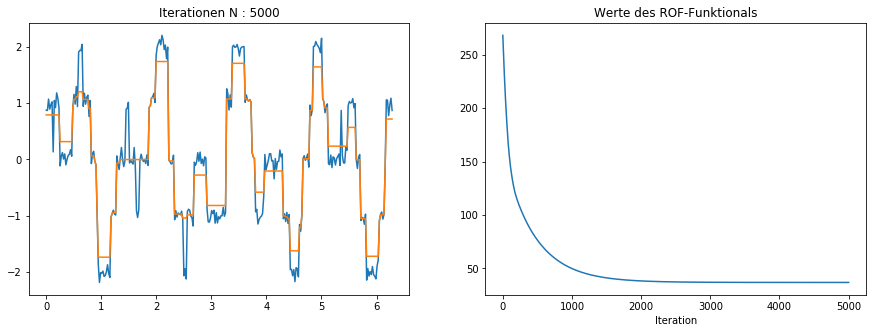

In [11]:
visualize_approximations()